In [1]:
### ---- Import Libraries ---- ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.colors as col

In [2]:
### ---- Read Data Files and Make a 3rd Data File ---- ###

# Read in training data csv file and check head
w_Train = pd.read_csv("trainingData.csv", sep=",")
w_Validate = pd.read_csv("validationData.csv", sep=",")

In [3]:
f_Train = w_Train.copy() #(19937, 529)
f_Validate = w_Validate.copy() #(1111, 529)

In [4]:
### ---- Select / Filter Buildings using Loc function ---- ###
#Min = 0, max = 2

building_0 = f_Train.loc[w_Train['BUILDINGID'] == 0]
building_1 = f_Train.loc[w_Train['BUILDINGID'] == 1]
building_2 = f_Train.loc[w_Train['BUILDINGID'] == 2]


building_0_val = f_Validate.loc[w_Validate['BUILDINGID'] == 0]
building_1_val = f_Validate.loc[w_Validate['BUILDINGID'] == 1]
building_2_val = f_Validate.loc[w_Validate['BUILDINGID'] == 2]

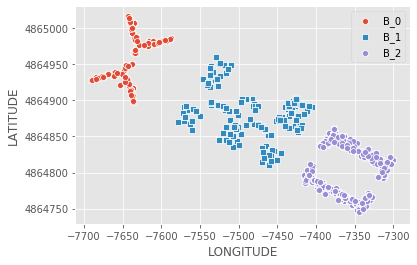

In [5]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_0, marker = "o", label = "B_0") # Can specify which floors using operators
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_1, marker = "s", label = "B_1")
sns.scatterplot(x='LONGITUDE', y='LATITUDE', data=building_2, marker = "o", label = "B_2")
plt.rcParams["figure.figsize"] = (20,10)

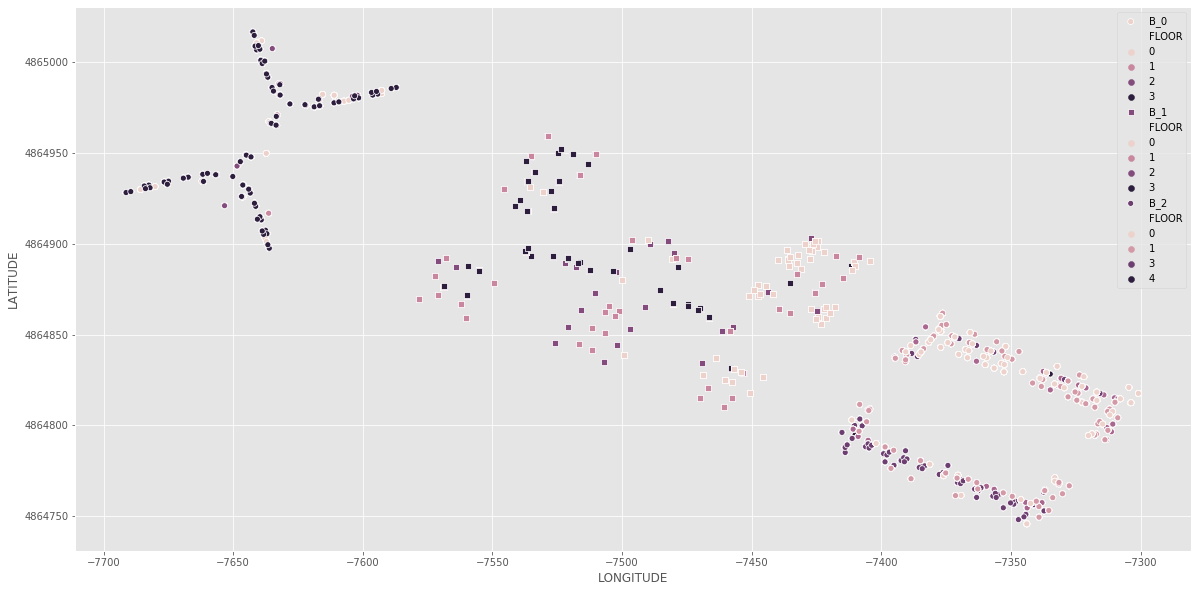

In [6]:
#### ----  BUILDING - MAPPING BY LONGITUDE AND LATITUDE ---- ####

plt.style.use('ggplot')
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_0, marker = "o", label = "B_0") # Can specify which floors using operators
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_1, marker = "s", label = "B_1")
sns.scatterplot(x='LONGITUDE', y='LATITUDE', hue='FLOOR', data=building_2, marker = "o", label = "B_2")
plt.rcParams["figure.figsize"] = (20,10)

In [7]:
#### ----  SETTING INDEPENDENT AND TARGET VARIABLES BUILDING 2 ---- ###

## Define Target (Label = y) and Predictors (Label = X)

X = rtl_0_30_b2.iloc[:, 0:520] # WAP columns
y = rtl_0_30_b2.loc[:, "LONGITUDE"] #  Target column

In [8]:
#### ----  GENERIC MODEL PREPROCESSING ---- ###

## TRAIN TEST SPLIT

## Splitting into Training and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [9]:
#### ---- REGRESSION: GRADIENT BOOSTED TREES ---- ###

from sklearn.ensemble import GradientBoostingRegressor

## Fitting Linear Regression to the Training Set
gbt_reg = GradientBoostingRegressor()
gbt_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = gbt_reg.predict(X_test)


In [10]:
## Establishing the Error Metrics for Regression 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Assigning error metrics

mse1 = round(mean_squared_error(y_test, y_pred), 4)
rmse1 = round(np.sqrt(mse1), 4)
mae1 = round(mean_absolute_error(y_test, y_pred), 4)
r2a = round(r2_score(y_test, y_pred), 4)

In [11]:

## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for Model 1 - Gradient Boosted Trees:\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse1,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse1,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae1,
      "\n\n", f"The Correlation (r2) is:\n",r2a,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Model 1 - Gradient Boosted Trees:

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 108.4509 

 The Root Mean Squared Error (RMSE) is:
 10.414 

 The Mean Absolute Error (MAE) is:
 7.4538 

 The Correlation (r2) is:
 0.8809 

 -----------------------------------------------------



In [12]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual

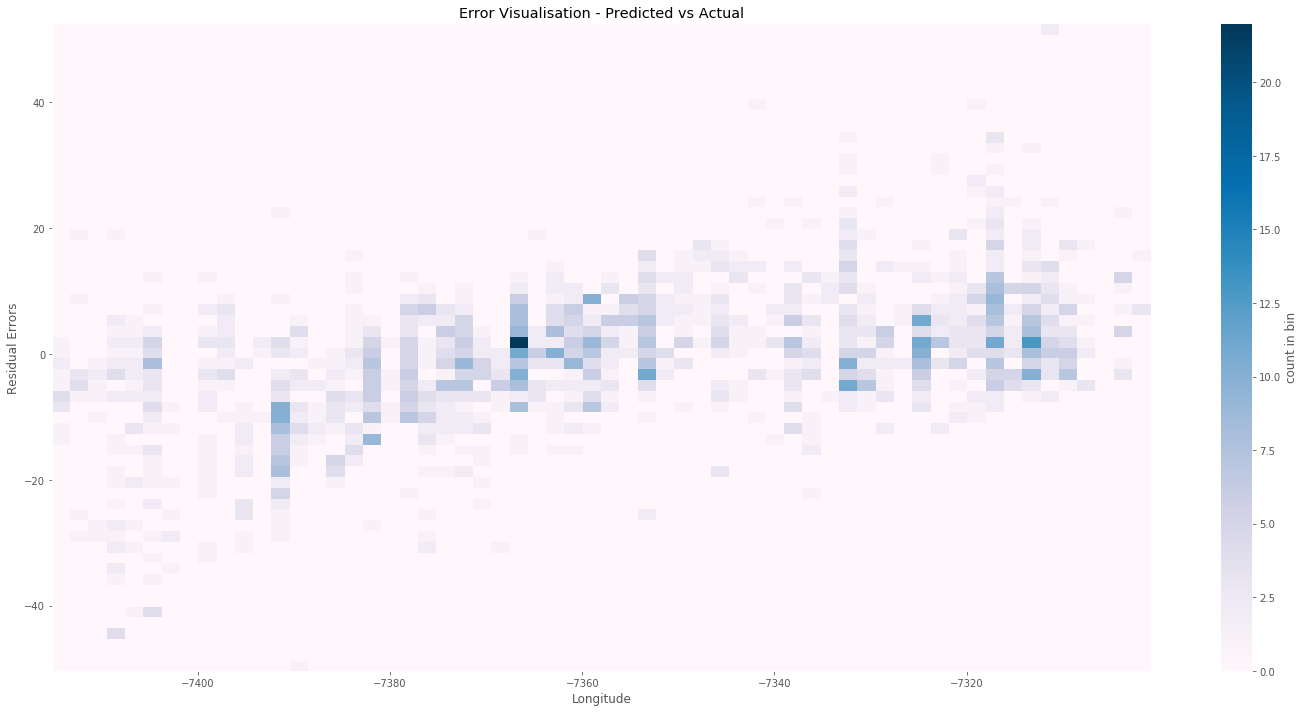

In [13]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("GBT Error Plt.png")

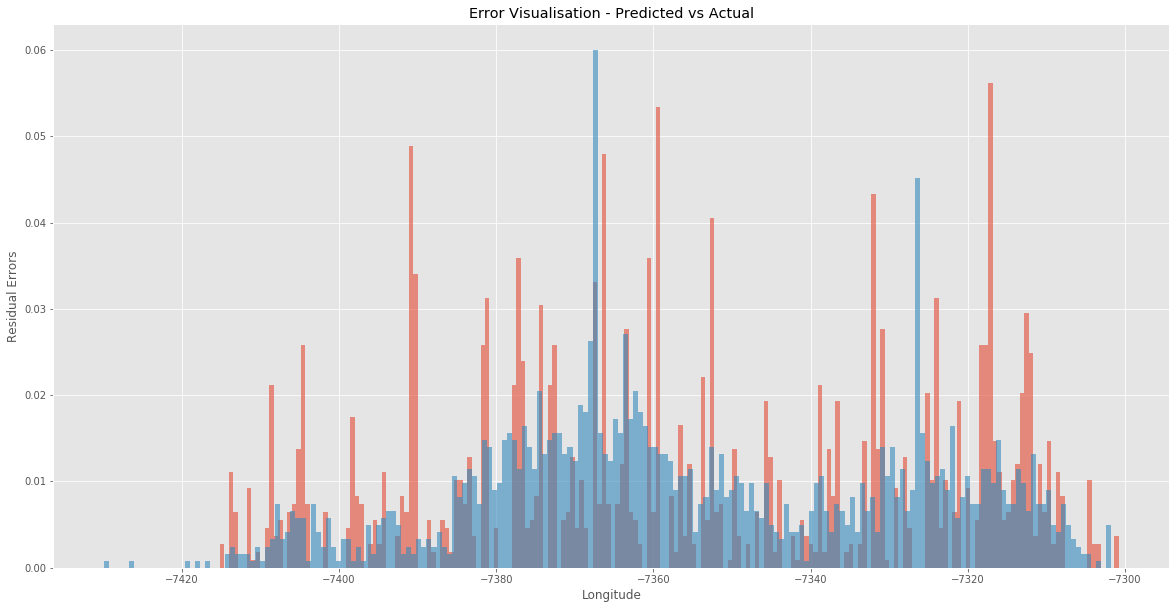

In [14]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")


plt.savefig("GBT Error Hist.png")

In [15]:
#### ---- REGRESSION: RANDOM FOREST ---- ###

from sklearn.ensemble import RandomForestRegressor

## Fitting Linear Regression to the Training Set
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = rf_reg.predict(X_test)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
## Establishing the Error Metrics for Regression 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Assigning error metrics

mse2 = round(mean_squared_error(y_test, y_pred), 4)
rmse2 = round(np.sqrt(mse2), 4)
mae2 = round(mean_absolute_error(y_test, y_pred), 4)
r2b = round(r2_score(y_test, y_pred), 4)

In [17]:

## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for Model 2 - Random Forest:\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse2,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse2,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae2,
      "\n\n", f"The Correlation (r2) is:\n",r2b,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Model 2 - Random Forest:

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 69.0322 

 The Root Mean Squared Error (RMSE) is:
 8.3086 

 The Mean Absolute Error (MAE) is:
 4.268 

 The Correlation (r2) is:
 0.9242 

 -----------------------------------------------------



In [18]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual

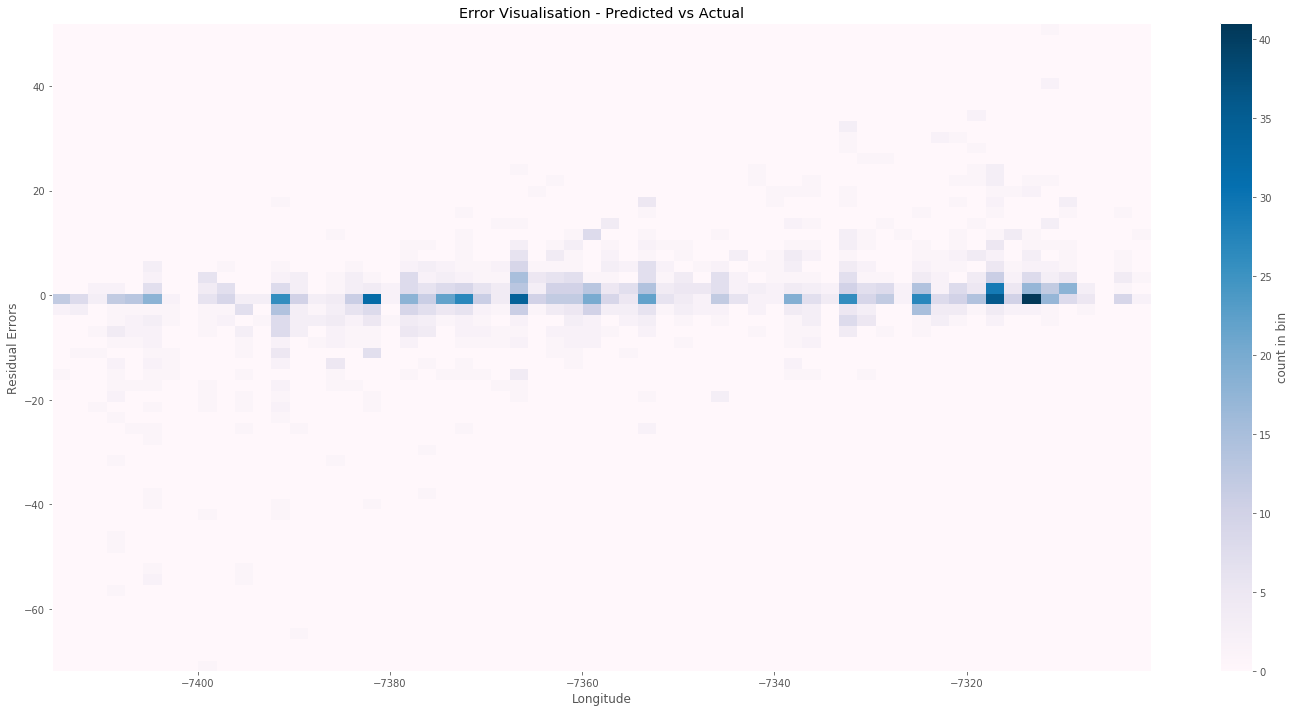

In [20]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap='PuBu')
plt.colorbar(label='count in bin')

plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("RF Error Plt.png")

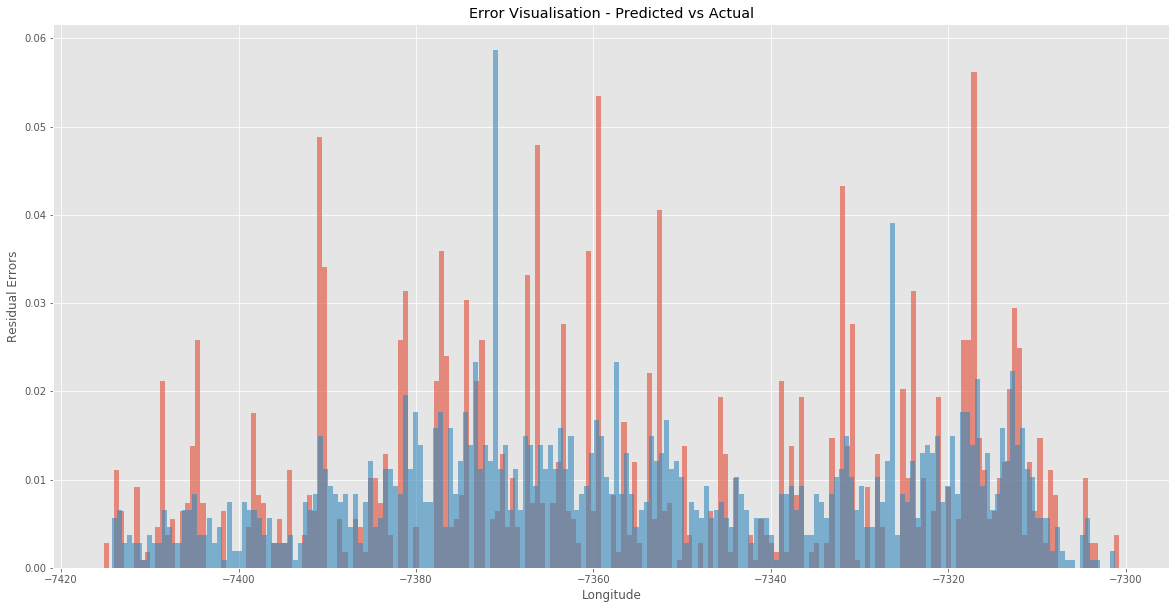

In [21]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")


plt.savefig("RF Error Hist.png")


In [22]:
#### ---- REGRESSION: LINEAR REGRESSION ---- ###

from sklearn.linear_model import LinearRegression

## Fitting Linear Regression to the Training Set
lm_reg = LinearRegression()
lm_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = lm_reg.predict(X_test)

In [23]:
## Establishing the Error Metrics for Regression 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Assigning error metrics

mse3 = round(mean_squared_error(y_test, y_pred), 4)
rmse3 = round(np.sqrt(mse3), 4)
mae3 = round(mean_absolute_error(y_test, y_pred), 4)
r2c = round(r2_score(y_test, y_pred), 4)

In [24]:

## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for Model 3 - Linear Regression:\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse3,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse3,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae3,
      "\n\n", f"The Correlation (r2) is:\n",r2c,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Model 3 - Linear Regression:

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 205.0814 

 The Root Mean Squared Error (RMSE) is:
 14.3207 

 The Mean Absolute Error (MAE) is:
 10.6 

 The Correlation (r2) is:
 0.7749 

 -----------------------------------------------------



In [25]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_pred
z = y_residual


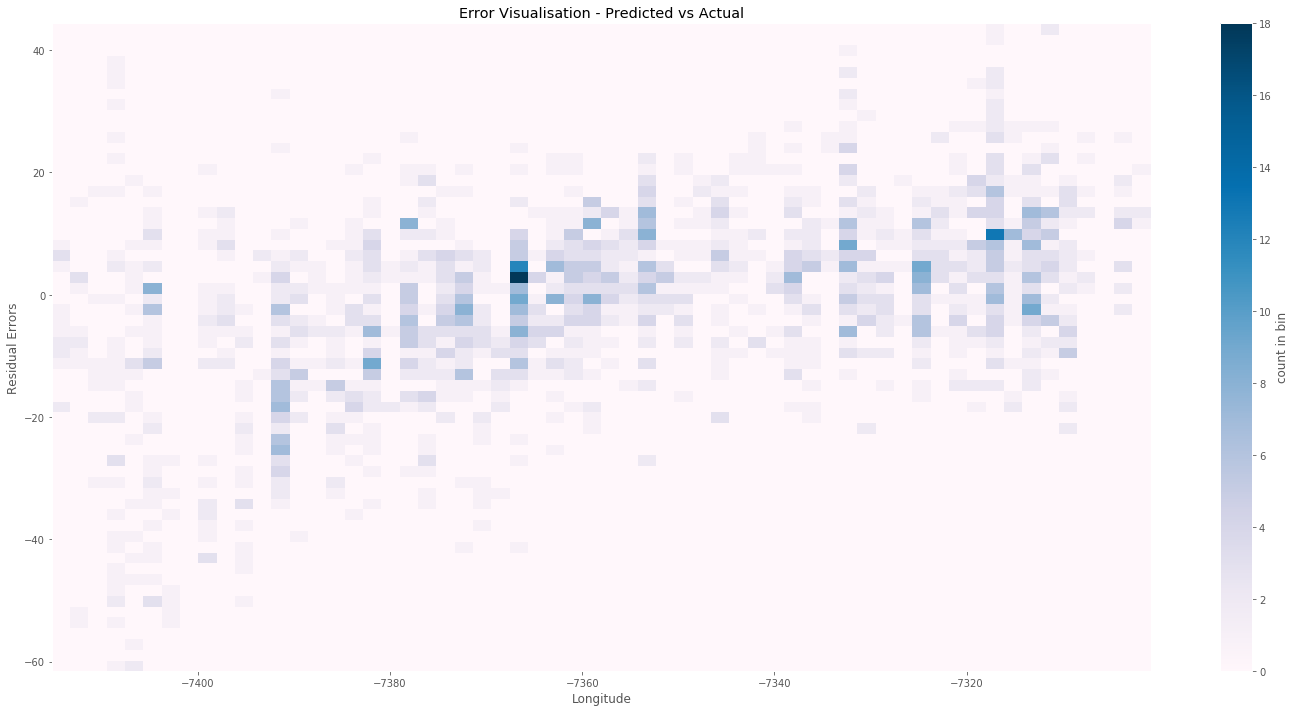

In [26]:
#### ---- ERROR VISUALISATION: PLOTTING RESIDUALS - DENSITY - TWO DIMENSIONAL HISTOGRAM ---- ####

## Using Two Dimensional Binnings with a Colorbar

plt.style.use('ggplot')

## Setting variables
x=y_test
y=y_residual

## Setting Aesthetics and Labelling
plt.hist2d(x, y, bins=60, cmap="PuBu")
plt.colorbar(label='count in bin')

plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")
plt.ticklabel_format()
plt.tight_layout()
plt.grid(True) ## Adds grid lines

plt.savefig("LR Error Plt.png")

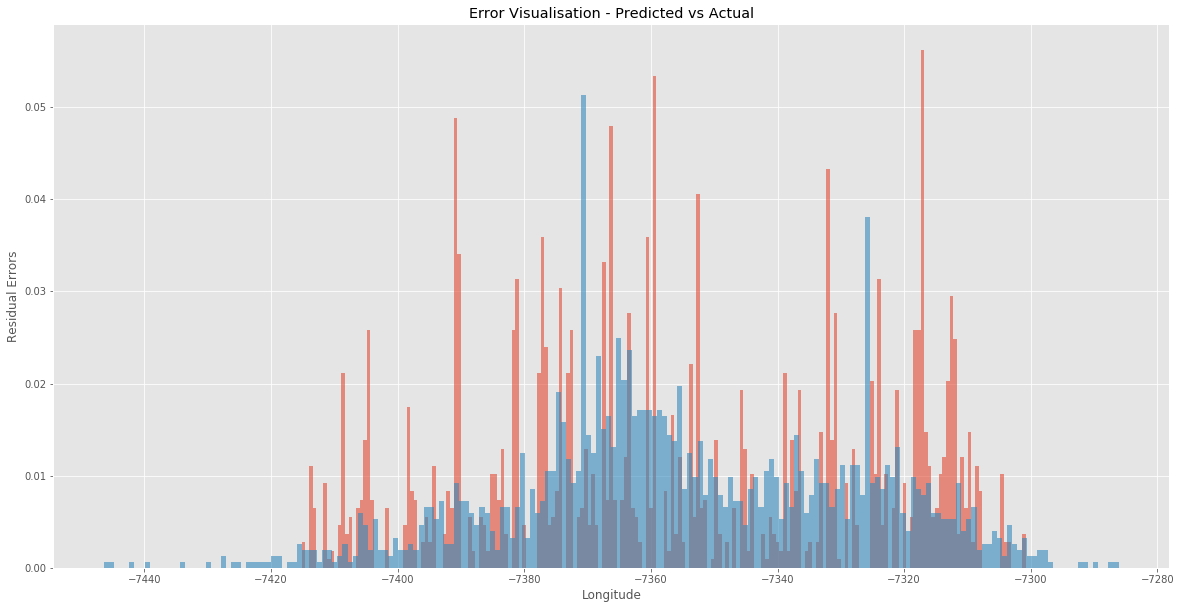

In [28]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###

x1 = y_test
x2 = y_pred
#x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(histtype='stepfilled', density=True, alpha=0.6, bins=200)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")


plt.savefig("LR Error Hist.png")


In [29]:
#### ---- REGRESSION: SVM v1 ---- ###

from sklearn.svm import LinearSVR

## Fitting Linear Regression to the Training Set

svr_reg = LinearSVR(
            C=50,
            fit_intercept=True,
            intercept_scaling=1.0,
            dual=True,
            verbose=0,
            random_state=42,
            max_iter=1000,
            )

svr_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = svr_reg.predict(X_test)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [30]:
## Establishing the Error Metrics for Regression 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Assigning error metrics

mse4 = round(mean_squared_error(y_test, y_pred), 4)
rmse4 = round(np.sqrt(mse4), 4)
mae4 = round(mean_absolute_error(y_test, y_pred), 4)
r2d = round(r2_score(y_test, y_pred), 4)

In [31]:

## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for Model SVM Linear:\n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse4,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse4,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae4,
      "\n\n", f"The Correlation (r2) is:\n",r2d,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Model SVM Linear:

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 240.2738 

 The Root Mean Squared Error (RMSE) is:
 15.5008 

 The Mean Absolute Error (MAE) is:
 11.6463 

 The Correlation (r2) is:
 0.7362 

 -----------------------------------------------------



In [32]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual


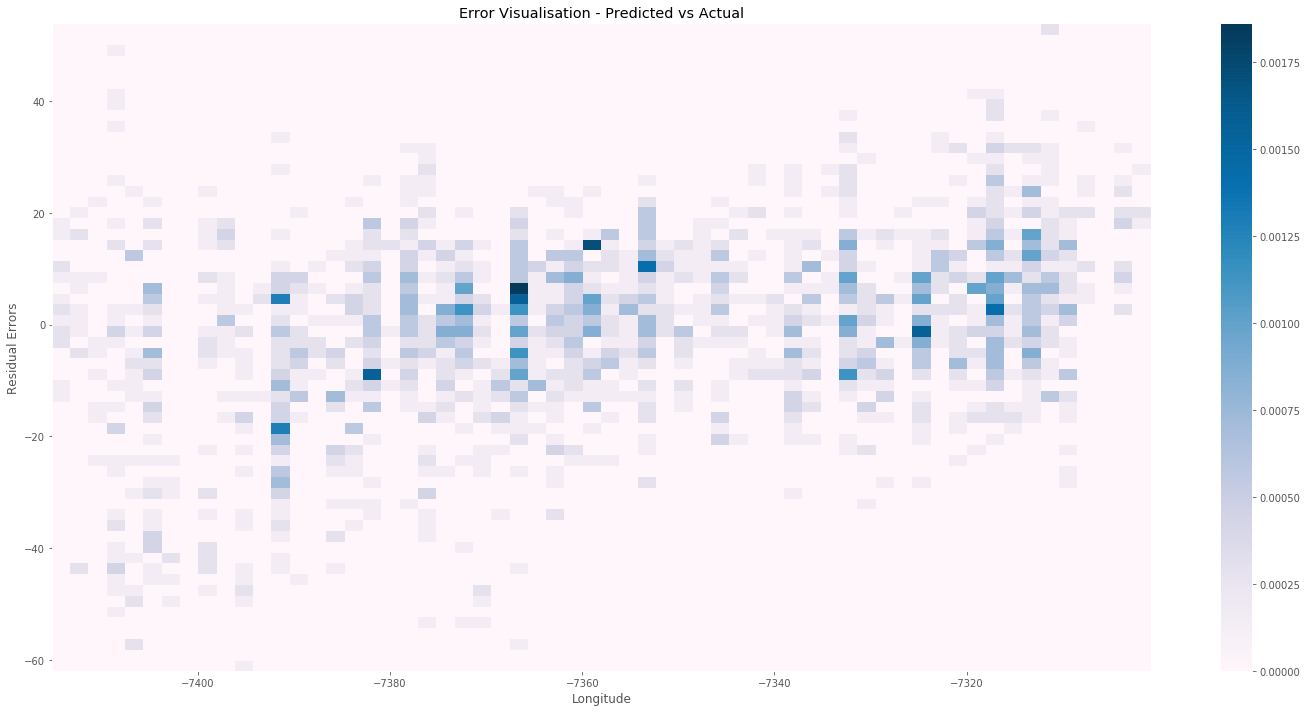

In [33]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###


## Setting options for X and Y 
y_residual = (y_test - y_pred)
x = y_test
y = y_residual


x1 = y_test
x2 = y_pred
x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(density=True, alpha=0.99, bins=60, cmap="PuBu")

plt.hist2d(x, y, **kwargs)
#plt.hist2d(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")
plt.hist2d
plt.colorbar()
plt.tight_layout()


plt.savefig("SVM Linear Error Plt.png")


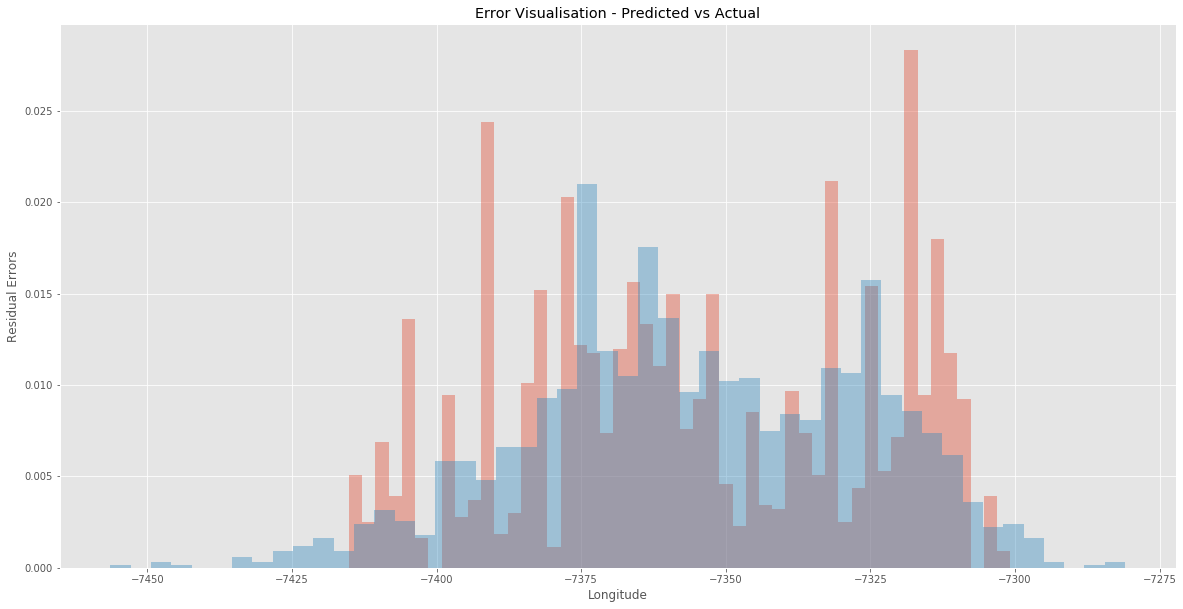

In [34]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS USING DENSITY ---- ###

x1 = y_test
x2 = y_pred

kwargs = dict(histtype='stepfilled', density=True, alpha=0.4, bins=50)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")

plt.savefig("SVM Linear Error Hist.png")

In [35]:
#### ---- REGRESSION: SVM 2 ---- ###

from sklearn.svm import NuSVR

## Fitting Linear Regression to the Training Set
nusvr_reg = NuSVR()
nusvr_reg.fit(X_train, y_train)

## Predicting the Test set results
y_pred = nusvr_reg.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
## Establishing the Error Metrics for Regression 

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Assigning error metrics

mse5 = round(mean_squared_error(y_test, y_pred), 4)
rmse5 = round(np.sqrt(mse5), 4)
mae5 = round(mean_absolute_error(y_test, y_pred), 4)
r2e = round(r2_score(y_test, y_pred), 4)

In [39]:

## Generic Printing Method for Errors - later to be used as a function

print(f"-----------------------------------------------------\n\n"
      "\t", "Error Report for Model 5 - nuSVR (2nd SVM Model): \n\n"
       "-----------------------------------------------------\n"
      "\n", f"The Mean Squared Error (MSE) is:\n", mse5,
      "\n\n", f"The Root Mean Squared Error (RMSE) is:\n",rmse5,
      "\n\n", f"The Mean Absolute Error (MAE) is:\n",mae5,
      "\n\n", f"The Correlation (r2) is:\n",r2e,"\n\n",
      "-----------------------------------------------------\n")

-----------------------------------------------------

	 Error Report for Model 5 - nuSVR (2nd SVM Model): 

-----------------------------------------------------

 The Mean Squared Error (MSE) is:
 895.1707 

 The Root Mean Squared Error (RMSE) is:
 29.9194 

 The Mean Absolute Error (MAE) is:
 25.7479 

 The Correlation (r2) is:
 0.0173 

 -----------------------------------------------------



In [40]:
### ---- ERROR VISUALISATION: SETTING VARIABLES FOR PLOTS ---- ###

## Selecting the X and Y data
y_residual = (y_test - y_pred)
x = y_test
y = y_residual

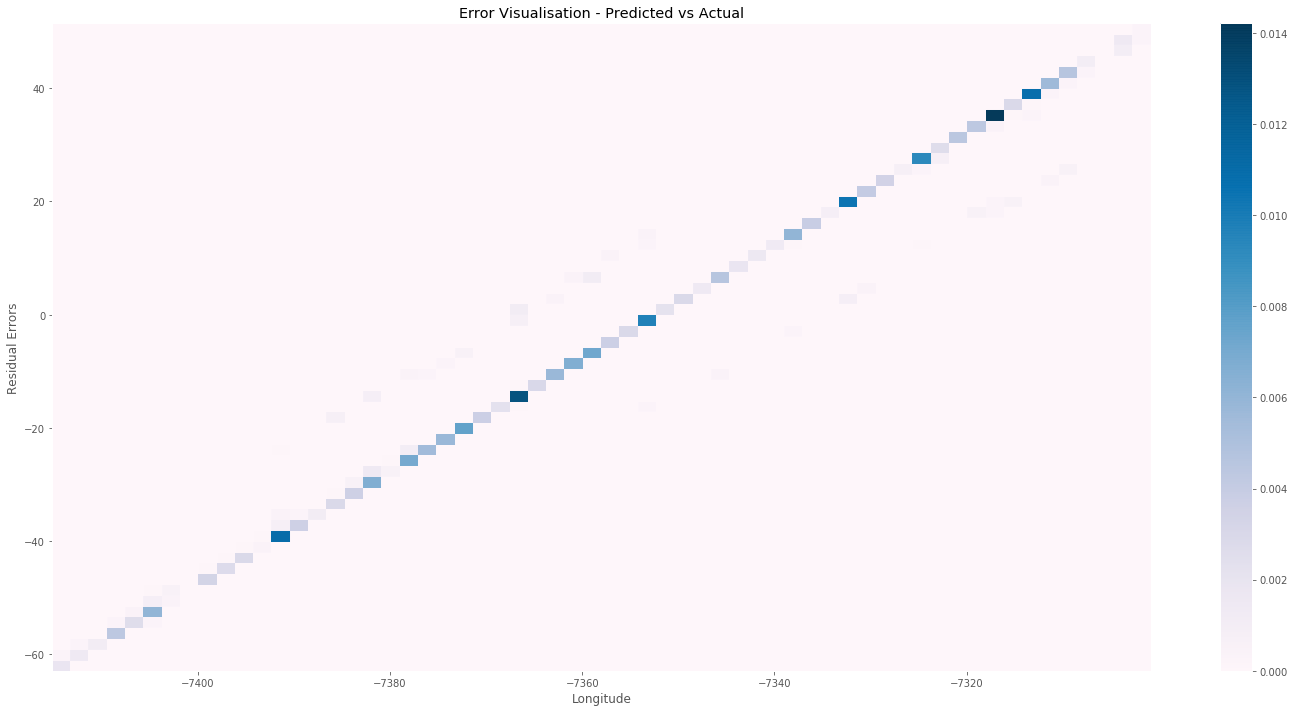

In [41]:
### ---- ERROR VISUALISATION: ACTUAL V PREDICTED COORDINATES ---- ###


## Setting options for X and Y 
y_residual = (y_test - y_pred)
x = y_test
y = y_residual


x1 = y_test
x2 = y_pred
x3 = y_test - y_pred

## Setting up a Key Word Argument to take the formatting arguments

kwargs = dict(density=True, alpha=0.99, bins=60, cmap="PuBu")

plt.hist2d(x, y, **kwargs)
#plt.hist2d(x2, **kwargs)
#plt.hist(x3, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")
plt.hist2d
plt.colorbar()
plt.tight_layout()


plt.savefig("SVM Linear Error Plt.png")

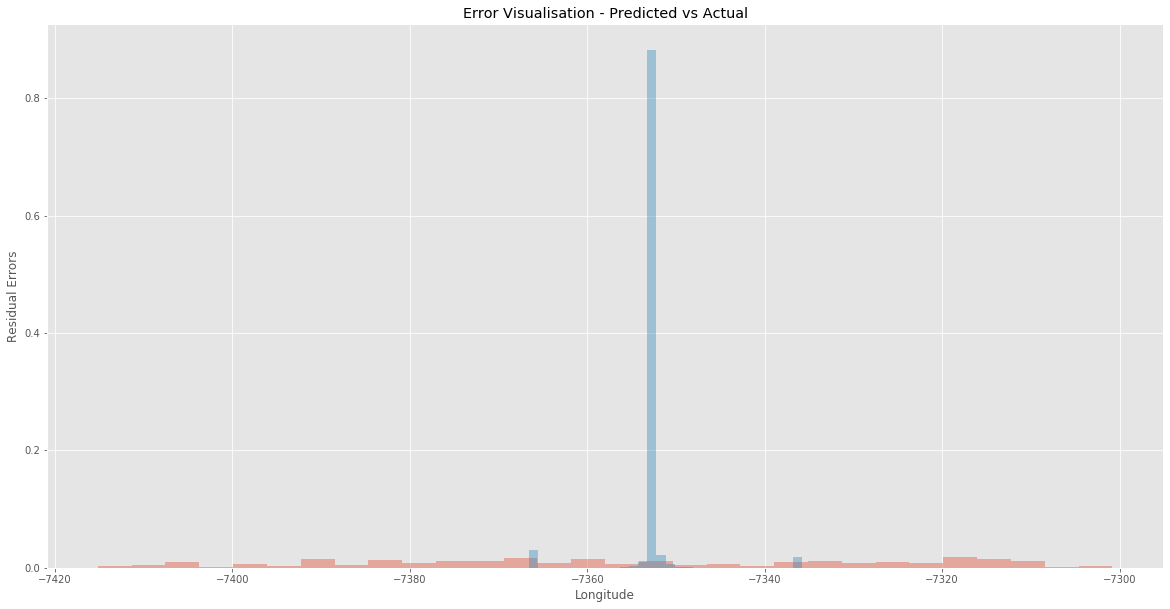

In [42]:
### ---- ERROR VISUALISATION: PLOTTING RESIDUALS USING DENSITY ---- ###

x1 = y_test
x2 = y_pred

kwargs = dict(histtype='stepfilled', density=True, alpha=0.4, bins=30)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.title("Error Visualisation - Predicted vs Actual")
plt.xlabel("Longitude")
plt.ylabel("Residual Errors")

plt.savefig("SVM v2 Error Hist.png")

In [43]:
#### ---- CREATING A CONSOLIDATED ERROR DATAFRAME USING DICTIONARIES ---- ####

error_df = pd.DataFrame(
    { "Mean Squared Error" : [mse1, mse2, mse3, mse4, mse5],
      "Root Mean Squared Error" : [rmse1, rmse2, rmse3, rmse4, rmse5],
      "Mean Absolute Error" : [mae1, mae2, mae3, mae4, mae5],
      "Correlation (R2)" : [r2a, r2b, r2c, r2d, r2e]},
     index = ["GBT", "RF", "LR", "SVML", "nuSVM"])

error_df

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,Correlation (R2)
GBT,108.4509,10.4140,7.4538,0.8809
RF,69.0322,8.3086,4.2680,0.9242
LR,205.0814,14.3207,10.6000,0.7749
SVML,240.2738,15.5008,11.6463,0.7362
nuSVM,895.1707,29.9194,25.7479,0.0173
